In [2]:
from svd_tool import plot_singular
from svd_tool import plot_ce_index
from svd_tool import analysis_u
from svd_tool import macro_analysis
from svd_tool import micro_analysis_jac
from svd_tool import micro_analysis_ig
from svd_tool import dgbd_ce
from svd_tool import save_cg

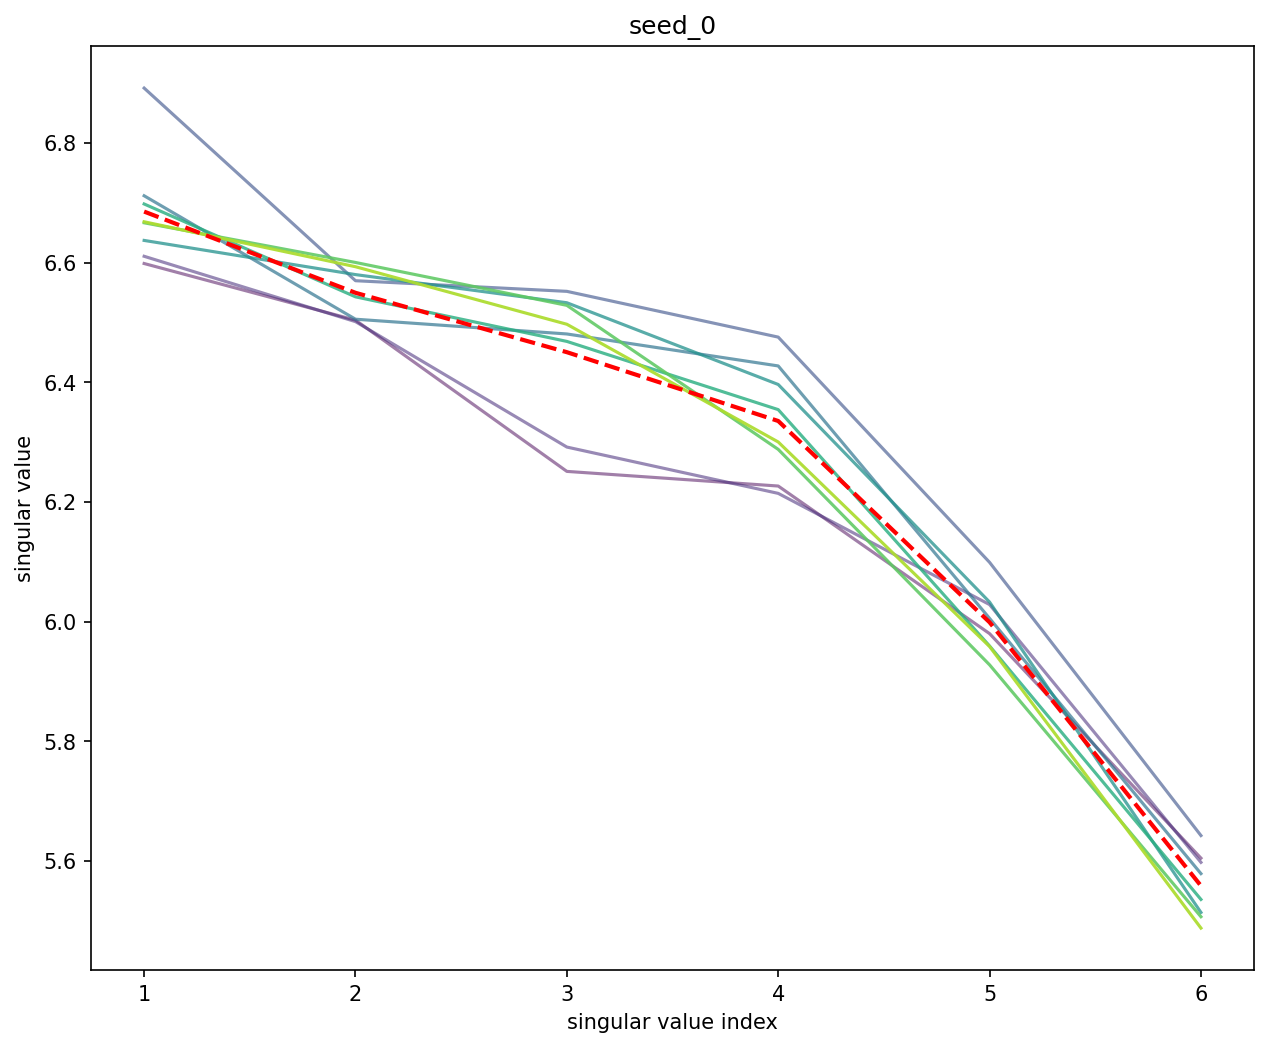

In [2]:
test_id = 'long_term_forecast_lorzen_10000_no_noise_NN_Lorzen_ft-1_sl1_pl1_dm256_nh8_el2_dl1_df512_fc1_flocnormal_dtTrue_Exp_'
start = 1000
end = 9000
interval = 1000
seq_len = 1
singular, us, vts, mats, Sigs = plot_singular(test_id, seed = 1, start=start, end=end, interval=interval, log_bool=True)

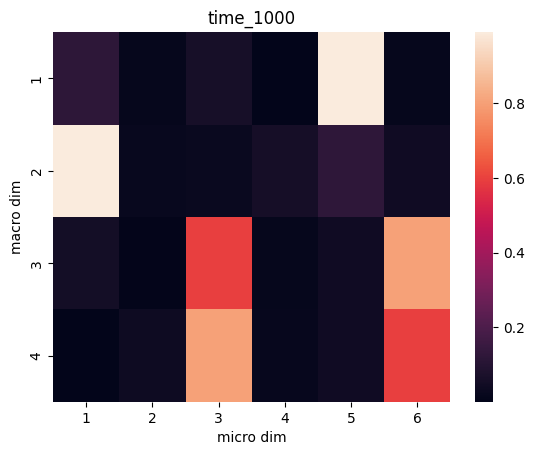

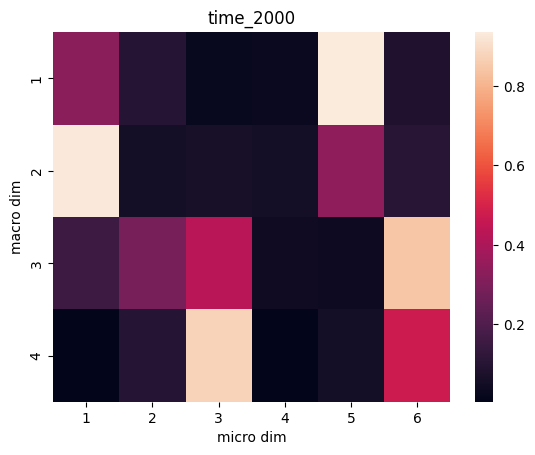

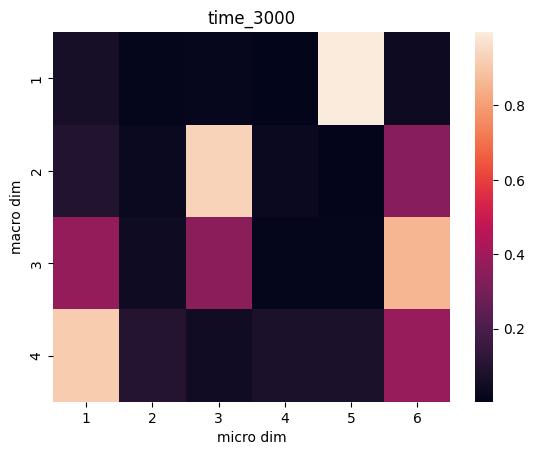

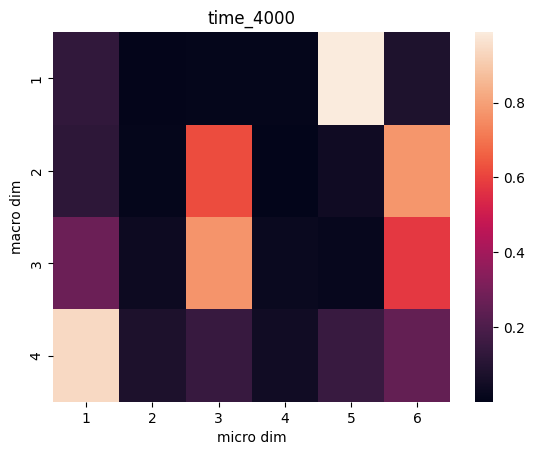

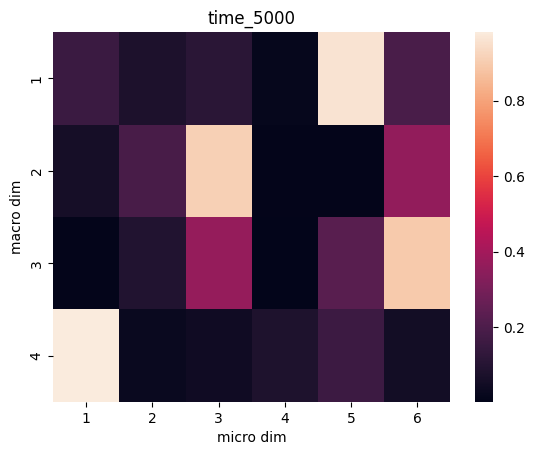

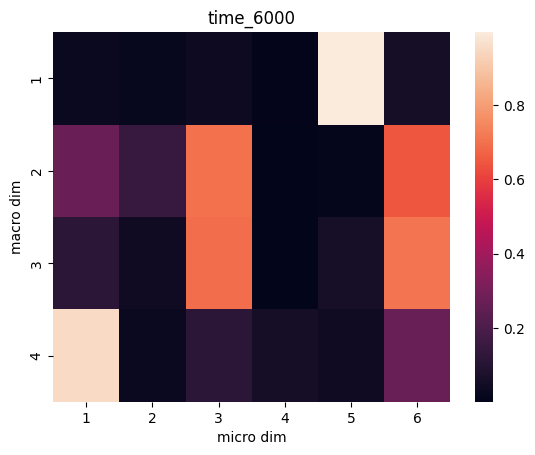

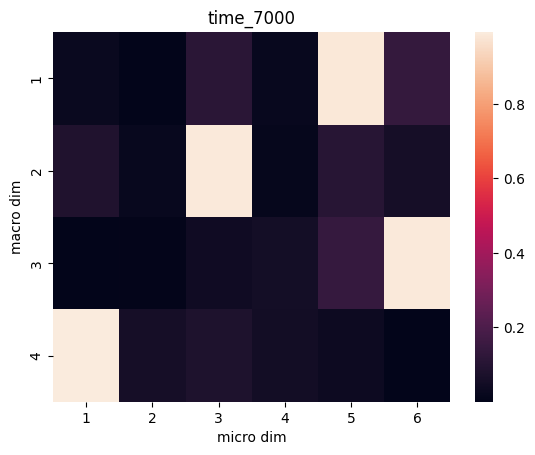

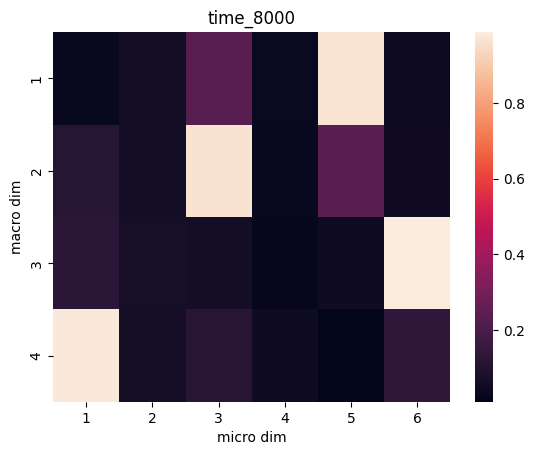

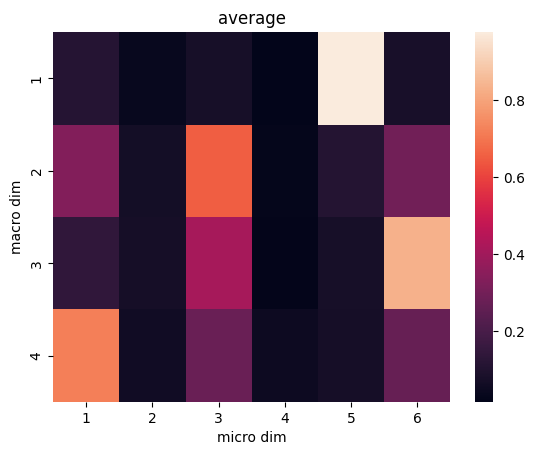

In [3]:
micro_dims = 6
macro_dims = 4
cg_mat_abs = analysis_u(us, micro_dims, start, end, interval, macro_dim=macro_dims, seq_len=1, abs_bool=True, mean_bool=True)

# YMZ

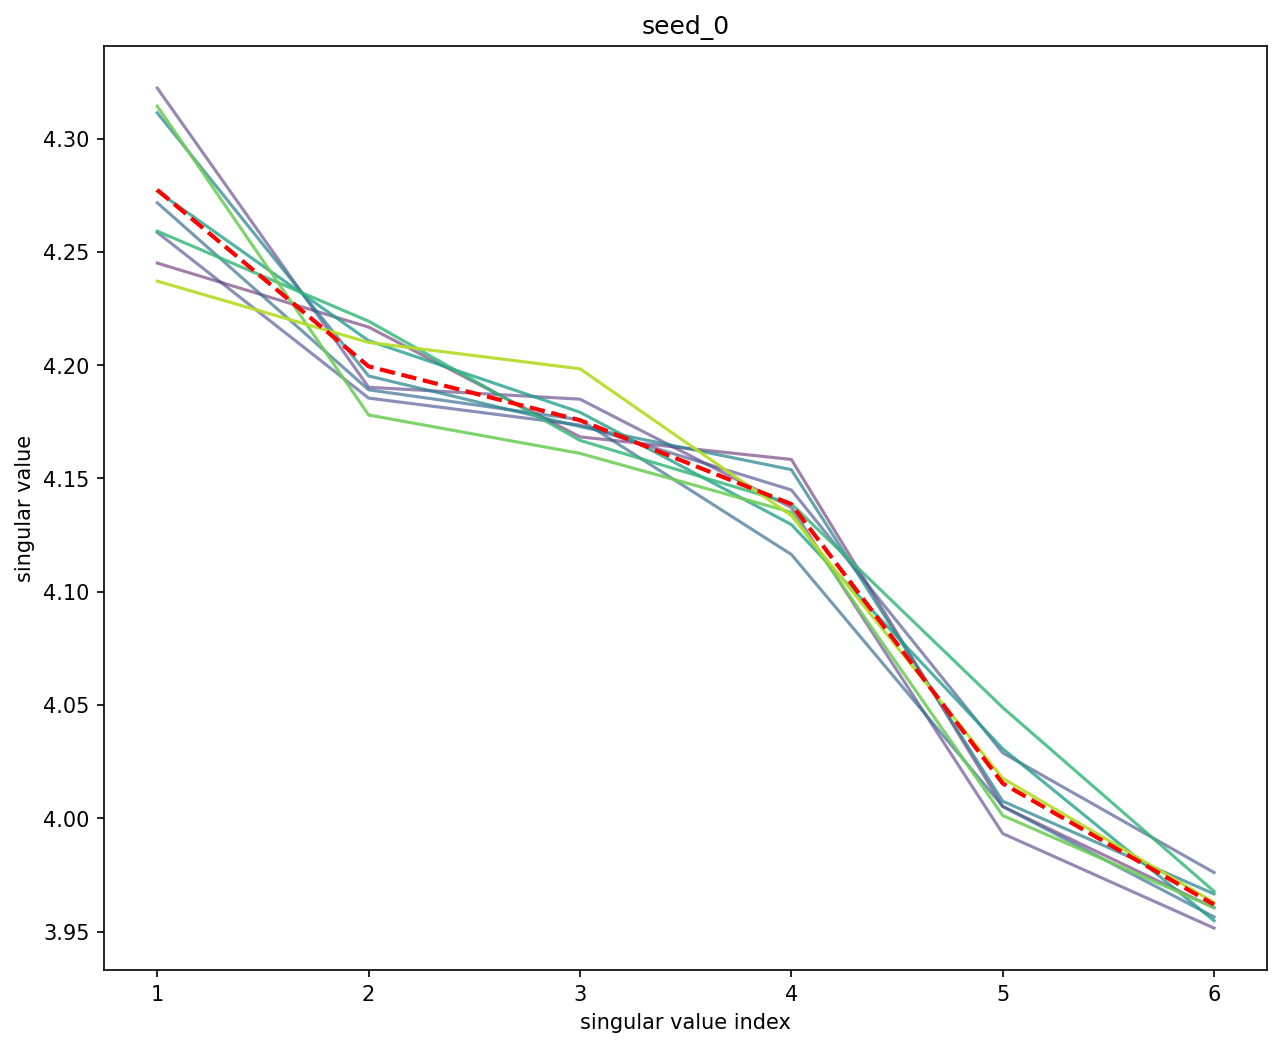

In [3]:
test_id = 'long_term_forecast_lorzen_10000_no_noise_NN_Lorzen_ft-1_sl1_pl1_dm256_nh8_el2_dl1_df512_fc1_flocnormal_dtTrue_Exp_'
start = 1000
end = 10000
interval = 1000
seq_len = 1
singular, us, vts, mats, Sigs = plot_singular(test_id, seed = 1, start=start, end=end, interval=interval, log_bool=True)

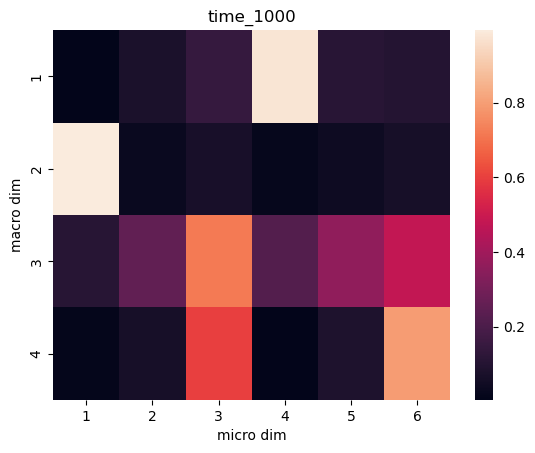

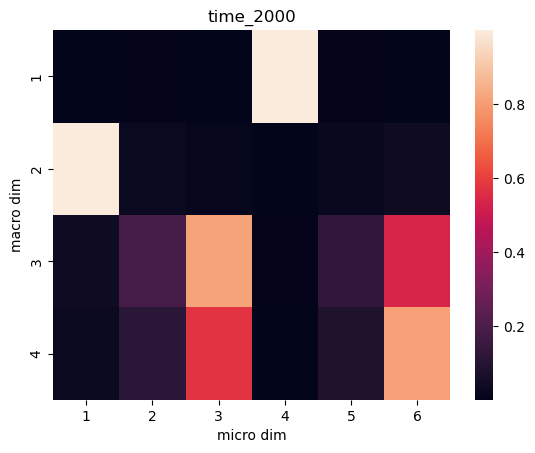

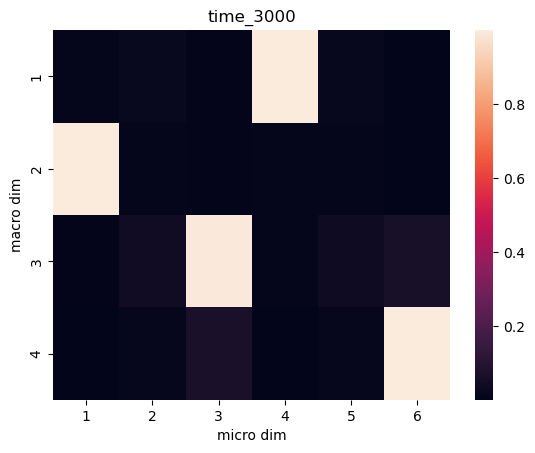

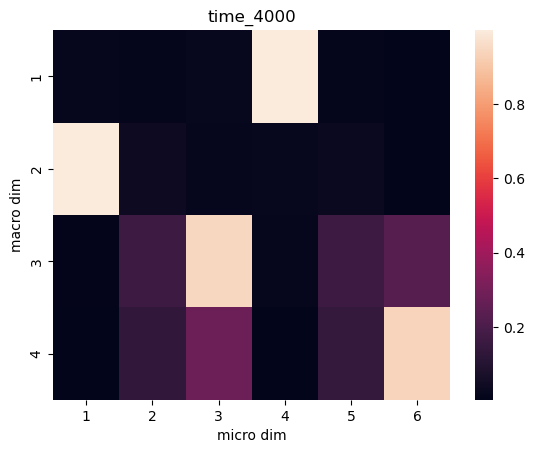

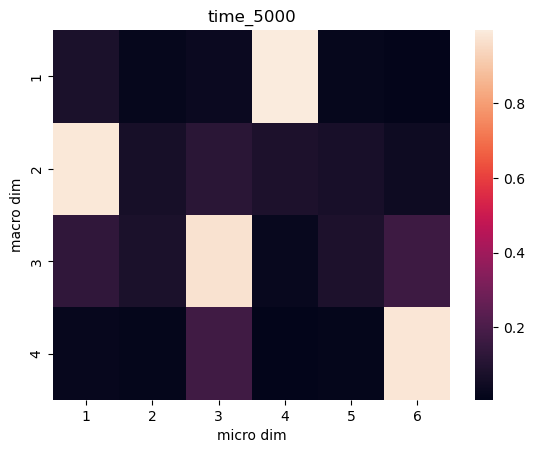

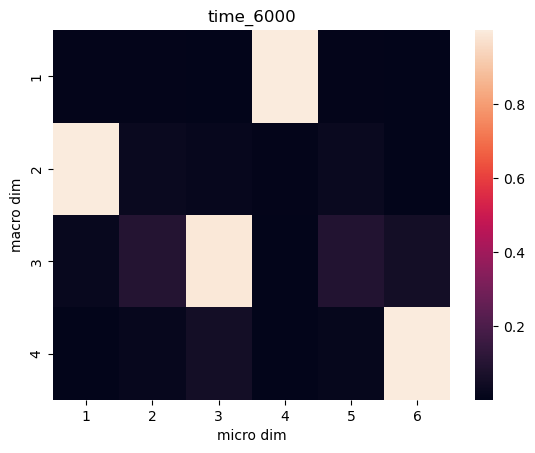

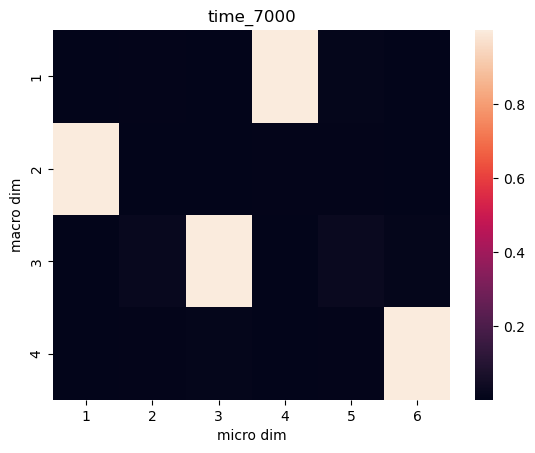

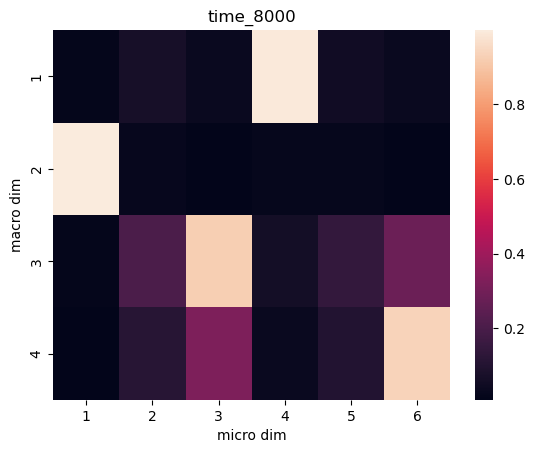

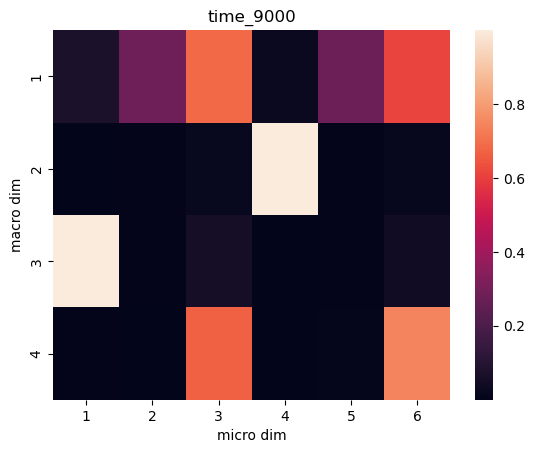

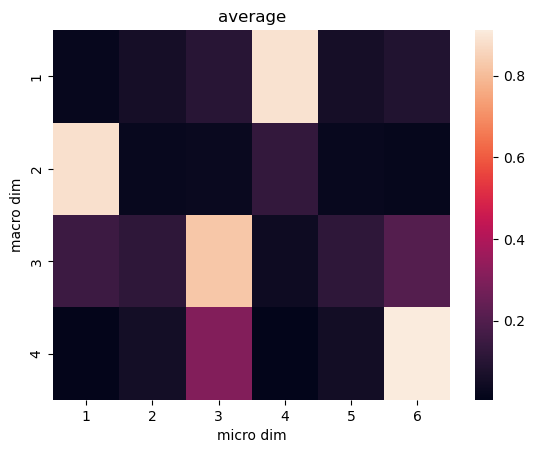

In [3]:
micro_dims = 6
macro_dims = 4
cg_mat_abs = analysis_u(us, micro_dims, start, end, interval, macro_dim=macro_dims, seq_len=1, abs_bool=True, mean_bool=True)